### Μέλη Ομάδας:
Ον/μο1:  Δημήτριος Κοκκίνης
Αρ. Μητρώου 1:  03118896

Ον/μο2:  Νικόλαος Μπλέτσας
Αρ. Μητρώου 2: 03118899

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      count = 0
      for i in range(len(self.y_true)):
          if self.y_true[i] == self.y_pred[i]: #σωστές προβλέψεις
              count +=1

      acc = count/len(self.y_pred) 
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv('/content/drive/My Drive/music_df_processed.csv')

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


Χρησιμοποιώντας της συνάρτηση describe μπορούμε να δούμε διάφορες μετρήσεις.

## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}


# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

#Μεταρέπω σε dataframes

x_train = pd.DataFrame(x_train) 
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

#Πρόσθεση Columns

x_train = x_train.assign(acousticness = train["acousticness"])
x_train = x_train.assign(danceability = train["danceability"])
x_train = x_train.assign(energy = train["energy"])
x_train = x_train.assign(instrumentalness = train["instrumentalness"])
x_train = x_train.assign(liveness = train["liveness"])
x_train = x_train.assign(speechiness = train["speechiness"])

y_train = y_train.assign(music_genre = train["music_genre"])

x_test = x_test.assign(acousticness = test["acousticness"])
x_test = x_test.assign(danceability = test["danceability"])
x_test = x_test.assign(energy = test["energy"])
x_test = x_test.assign(instrumentalness = test["instrumentalness"])
x_test = x_test.assign(liveness = test["liveness"])
x_test = x_test.assign(speechiness = test["speechiness"])

y_test = y_test.assign(music_genre = test["music_genre"])

## Your code above
##################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below

#Για την εμφάνιση των γραμμών 
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

#Για την εμφάνιση των στήλων
print(len(x_train.columns))
print(len(x_test.columns))
print(len(y_train.columns))
print(len(y_test.columns))

#Για εξακρίβωση σωστού χωρισμού
print(len(x_train)/ len(data))
print(len(x_test) / len(data))
## Your code above
##################

9471
4060
9471
4060
6
6
1
1
0.6999482669425763
0.3000517330574237


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [ ]:
# Range of x_train, x_test columns

##################
## Your code below
#Max Values
print(x_train.max())
print(x_test.max())


#Min Values

print(x_train.min())
print(x_test.min())
## Your code above
##################

acousticness        0.994
danceability        0.977
energy              0.999
instrumentalness    0.986
liveness            0.991
speechiness         0.922
dtype: float64
acousticness        0.981
danceability        0.973
energy              0.998
instrumentalness    0.974
liveness            0.983
speechiness         0.795
dtype: float64
acousticness        0.000002
danceability        0.064500
energy              0.002590
instrumentalness    0.000000
liveness            0.019400
speechiness         0.022800
dtype: float64
acousticness        0.000001
danceability        0.082200
energy              0.075300
instrumentalness    0.000000
liveness            0.017300
speechiness         0.022400
dtype: float64


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;
**Ναι, παρατηρούμε ότι τα χαρακτηριστικά έχουν παρόμοιο εύρος**

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 
**Ναι ισχύει, τα χαρακτηριστικά μας ανήκουν στο σύνολο [0,1)**

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
#Μετατροπή σε numpy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
        global dist
        if self.distance=='euclidian':
        ##################
        ## Your code below
          dist = np.linalg.norm(row1 - row2)
        ## Your code above
        ##################
        elif self.distance=='cosine':
        ##################
        ## Your code below
          dist = 1 - ((row1*row2)/(np.linalg.norm(row1, ord=2) * np.linalg.norm(row2, ord=2)))
        ## Your code above
        ##################
        return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for data in x:
        dist = self.get_distance(row,data) #βρες την απόσταση για όλους τους κόμβους
        distances.append(dist)

      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]

      ##################
      ## Your code below
      nn_labels = np.array(nn_labels)
      labels, counts = np.unique(nn_labels, return_counts=True)  #find the unique labels and the counts of them
      count_sort_ind = np.argsort(-counts)  #for the counts by index
      prediction = labels[count_sort_ind][0] #get the prediction        
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.6978235842333206
recall: 0.700595238095238
f1: 0.6985645933014354
accuracy: 0.7
Confusion matrix: 
[[28  5  7]
 [ 3 20  5]
 [ 6  4 22]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
#make 1d array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6978235842333206
recall: 0.700595238095238
f1: 0.6985645933014354
accuracy: 0.7
Confusion matrix: 
[[28  5  7]
 [ 3 20  5]
 [ 6  4 22]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 610 ms, sys: 0 ns, total: 610 ms
Wall time: 617 ms


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 962 ms, sys: 2.24 ms, total: 964 ms
Wall time: 975 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 31 ms, sys: 0 ns, total: 31 ms
Wall time: 33.2 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 917 ms, sys: 7.77 ms, total: 925 ms
Wall time: 930 ms


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 947 ms, sys: 1.15 ms, total: 948 ms
Wall time: 949 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 28.3 ms, sys: 943 µs, total: 29.2 ms
Wall time: 29 ms


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 500, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 1.07 s, sys: 10.8 ms, total: 1.08 s
Wall time: 1.08 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 500, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 974 ms, sys: 8.71 ms, total: 982 ms
Wall time: 977 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 31.2 ms


## Σχολιασμός
Παρατηρούμε ότι ενώ οι μετρικές του δικού μας knn είναι παρόμοιος με τον έτοιμο,έχουν εμφανή διαφορά στον χρόνο εκτέλεσης. Αυτό συμβαίνει λόγω των βελτιστοποιήσεων που έχει υποστεί ο έτοιμος αλγόριθμος της sklearn. Επίσης χρησιμοποιώντας για απόσταση το cosine ο αλγόριθμος είναι σημαντικά πιο αργός 

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
#Μετατροπή τιμών στις index τιμές που παράγονται από το dictionary
for i in range(len(y_train)):
  if y_train[i] == 'Electronic':
    y_train[i] = 0
  elif y_train[i] == 'Rock':
    y_train[i] = 1
  elif y_train[i] == 'Rap':
    y_train[i] = 2

for i in range(len(y_test)):
  if y_test[i] == 'Electronic':
    y_test[i] = 0
  elif y_test[i] == 'Rock':
    y_test[i] = 1
  elif y_test[i] == 'Rap':
    y_test[i] = 2

In [ ]:
#Μετατροπή σε integer
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:                               #Δίορθωση x_train -> x
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: 
          self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        denom = np.bincount(self.y)
        for j ,i in zip(self.x,self.y):
          self.pxC[:,i] += j
        self.pxC[:] = np.divide(self.pxC[:],denom)

        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
          product = 1
          for bit in range(len(x)):
            if (x[bit] == 1):
              product = product*self.pxC[bit][i] 
            else:
              product = product*(1-self.pxC[bit][i])
          pcX[i] = product * self.pC[i]

          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.6905698005698006
recall: 0.669345238095238
f1: 0.6603926071002454
accuracy: 0.66
Confusion matrix: 
[[23  7 10]
 [ 0 23  9]
 [ 2  6 20]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7592592592592592
recall: 0.736904761904762
f1: 0.7179780587038652
accuracy: 0.72
Confusion matrix: 
[[22  8 10]
 [ 0 28  4]
 [ 0  6 22]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 50.5 ms, sys: 0 ns, total: 50.5 ms
Wall time: 52.5 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 4.89 ms, sys: 0 ns, total: 4.89 ms
Wall time: 4.9 ms


## Σχολιασμός

Παρατηρούμε πως πάλι ο έτοιμος αλγόριθμος είναι πιο γρήγορος από τον δικό μας.

Όσον αφορά τις μετρικές μας βλέπουμε ότι ο αλγόριθμός μας παραγεί λίγο χειρότερα αποτελέσματα απο αυτόν της sklearn. Ανεβάζοντας το μέγεθος τον δειγμάτων παρατηρούμε ότι η απόδοση του sklearn πέφτει ενώ του δικού μας αλγόριθμου βελτιωνέται.Αυτό συμβαίνει διότι εμείς έχουμε κάνει discretize ενώ ο έτοιμος κάνει την παραδοχή ότι τα δεδομένα ακολουθούν κανονική κατανομή

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input,self.weights) + self.biases
        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            
            activations.append(l.forward(input))
            input = activations[-1]


            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 0
Train accuracy: 0.3317495512617464
Val accuracy: 0.32610837438423645


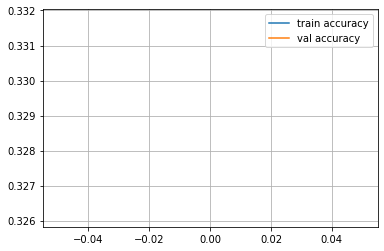

Epoch 1
Train accuracy: 0.3317495512617464
Val accuracy: 0.32610837438423645


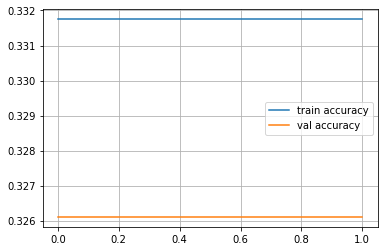

Epoch 2
Train accuracy: 0.3317495512617464
Val accuracy: 0.32610837438423645


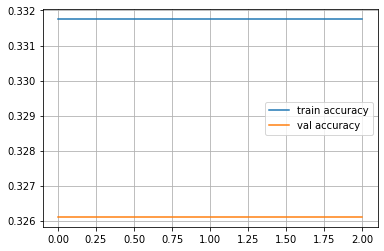

Epoch 3
Train accuracy: 0.3317495512617464
Val accuracy: 0.32610837438423645


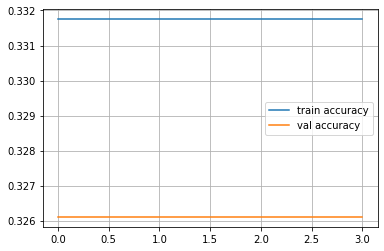

Epoch 4
Train accuracy: 0.3317495512617464
Val accuracy: 0.3258620689655172


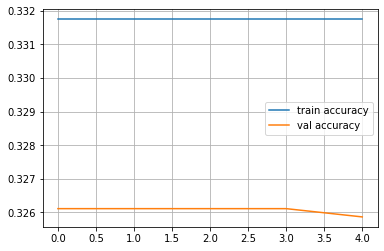

Epoch 5
Train accuracy: 0.3317495512617464
Val accuracy: 0.3258620689655172


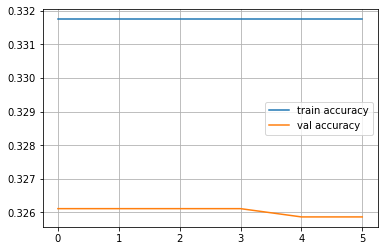

Epoch 6
Train accuracy: 0.33164396579030725
Val accuracy: 0.32561576354679805


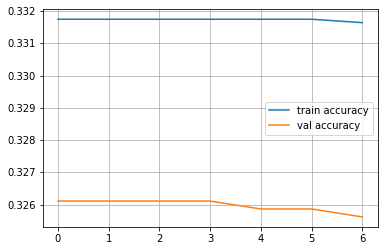

Epoch 7
Train accuracy: 0.33132720937598986
Val accuracy: 0.32561576354679805


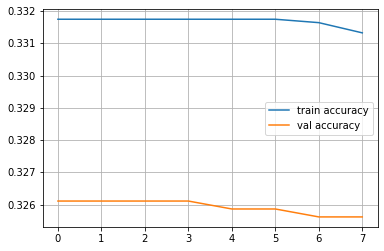

Epoch 8
Train accuracy: 0.33122162390455073
Val accuracy: 0.32610837438423645


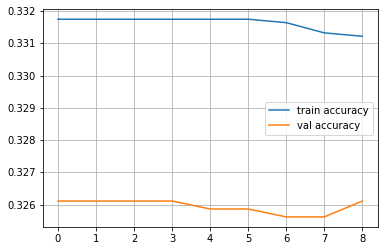

Epoch 9
Train accuracy: 0.33196072220462464
Val accuracy: 0.3270935960591133


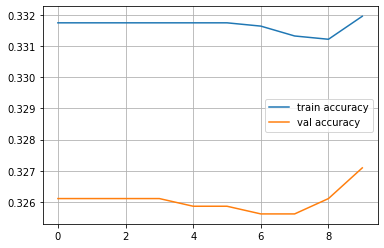

Epoch 10
Train accuracy: 0.3324886495618203
Val accuracy: 0.32807881773399017


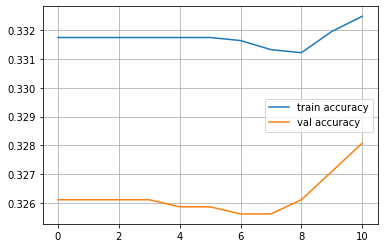

Epoch 11
Train accuracy: 0.33343891880477244
Val accuracy: 0.3295566502463054


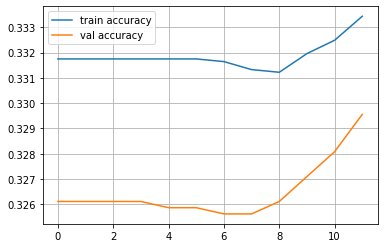

Epoch 12
Train accuracy: 0.3356562137049942
Val accuracy: 0.3315270935960591


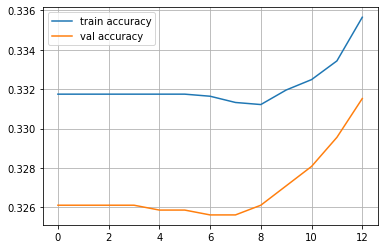

Epoch 13
Train accuracy: 0.33914053426248547
Val accuracy: 0.3347290640394089


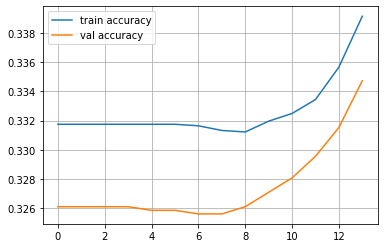

Epoch 14
Train accuracy: 0.3442086368915637
Val accuracy: 0.3389162561576355


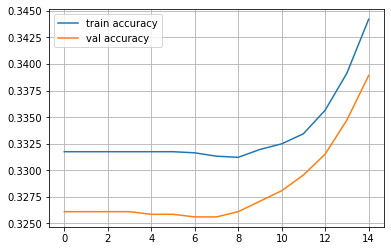

Epoch 15
Train accuracy: 0.34843205574912894
Val accuracy: 0.341871921182266


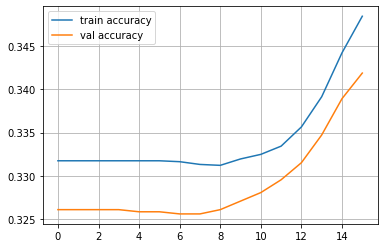

Epoch 16
Train accuracy: 0.35476718403547675
Val accuracy: 0.345320197044335


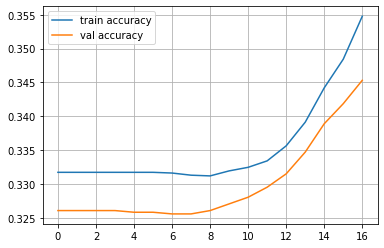

Epoch 17
Train accuracy: 0.36215816703621584
Val accuracy: 0.34926108374384235


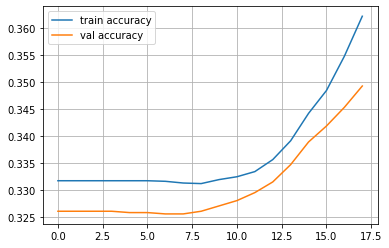

Epoch 18
Train accuracy: 0.36859888079400277
Val accuracy: 0.3568965517241379


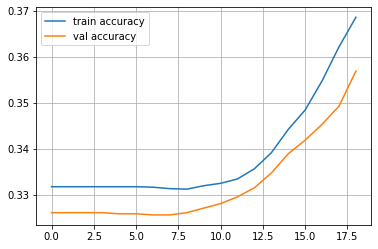

Epoch 19
Train accuracy: 0.37514518002322883
Val accuracy: 0.3657635467980296


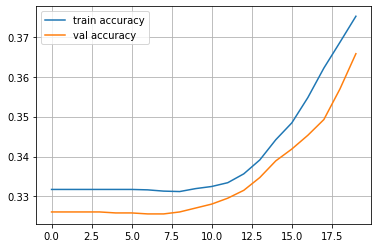

Epoch 20
Train accuracy: 0.38591489811002005
Val accuracy: 0.3724137931034483


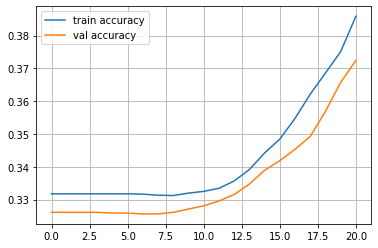

Epoch 21
Train accuracy: 0.39805722732552
Val accuracy: 0.3810344827586207


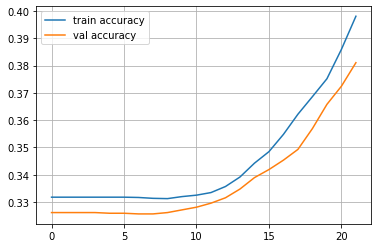

Epoch 22
Train accuracy: 0.40977721465526346
Val accuracy: 0.3975369458128079


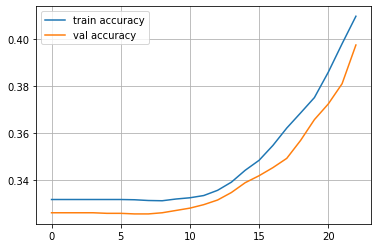

Epoch 23
Train accuracy: 0.41970224897054165
Val accuracy: 0.4142857142857143


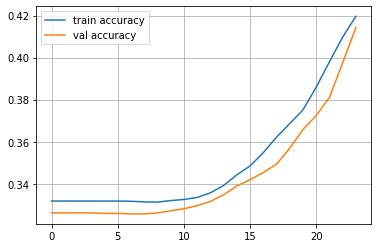

Epoch 24
Train accuracy: 0.4340618730862633
Val accuracy: 0.4273399014778325


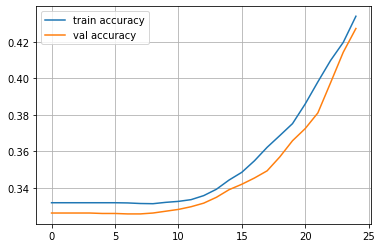

precision: 0.5430475719064262
recall: 0.43225679169390413
f1: 0.37938133485457276
accuracy: 0.4273399014778325
Confusion matrix: 
[[1173   60   91]
 [ 905  255  208]
 [1034   27  307]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7313905641453621
recall: 0.7188072354434256
f1: 0.7189898267927703
accuracy: 0.7199507389162562
Confusion matrix: 
[[ 812  318  194]
 [ 149 1073  146]
 [  61  269 1038]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


## Σχολιασμός

Παρατηρούμε ότι ο δικός μας αλγόριθμος έχει αρκέτα χαμηλότερο accuracy από τον έτοιμο, ο οποίος έχει υποστεί βελτιστοποιήσεις.

H βελτιστοποιημένη έκδοση του αλγορίθμου μας της βιβλιοθήκης sklearn βλέπουμε ότι έχει πολύ καλύτερο χρόνο εκτέλεσης και καλύτερα αποτελέσματα στο συγκεκριμένο απλό classification task. Ωστόσο, σε πιο δύσκολα task δεν μπορεί να αποδόσει τόσο καλά ενδεχομένως και δεν είναι εφικτό να πραγματοποιήσουμε αλλαγές ώστε να τη βελτιώσουμε.

Αντίθετα με την δική μας υλοποίηση μπορούμε να την τροποποιήσουμε και να την προσαρμόσουμε στα δεδομένα διαφόρων task που μπορεί να έχουμε

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



Απάντηση/Σχολιασμός:

Στη συγκεκριμένη εργασία υλοποιήσαμε 3 αλγορίθμους για ένα εύκολο classification task. Οι χρόνοι εκτέλεσης των αλγορίθμων μας ήταν περίπου ίδιοι με τους έτοιμους. Ωστόσο, τα καλύτερα αποτελέσματα προέκυψαν από τον knn αλγόριθμο, ο οποίος όμως για μεγάλο μέγεθος δεδομένων έχει μεγαλύτερο drop off


Ο naive bayes αλγόριθμος αποτελεί έναν απλό αλγόριθμο στατιστικής που χρησιμοποιείται για classification. Στον δικό μας αριθμό δεδομένων που είναι μικρός έχει χειρότερα αποτελέσματα από τον knn, όμως σε μεγαλύτερα δεδομένα θα έχει μεγαλύτερο accuracy και όπως βλέπουμε ακόμη και στα δικά μας δεδομένα εκτελείται σε αρκέτα λιγότερο χρόνο.

Από την άλλη η MLP υλοποίηση μπορεί με ορισμένες διαφοροποιήσεις να χρησιμοποιηθεί και σε άλλα πιο σύνθετα classification tasks παράγωντας ικανοποιητικά αποτελέσματα. Με training σε small batches θα μπορούσαμε να πετύχουμε πολύ καλύτερα αποτελέσματα από αυτά που έχουμε